# Calculate displacement and momentum thickness

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/ascldap/users/lcheung/wind_uq/amrwind-frontend/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os, shutil
for x in amrwindfedirs: sys.path.insert(1, x)

import postproamrwindsample_xarray as ppsamplexr
import numpy as np
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def loadpickle(picklefile):
    pfile          = open(picklefile, 'rb')
    ds             = pickle.load(pfile)
    pfile.close()
    return ds

In [3]:
def avgInflowPlane(U):
    return np.mean(U, axis=1)

In [4]:
rotorD = 127                # rotor diameter
A      = np.pi/4*rotorD**2  # Rotor Area
x0     = 2000
writeoutputs = True
datadir= 'data/'

In [7]:
RPdb_turb   = loadpickle('../../AMR.5kmX5km_turbine1/post_processing/means_noturb/rotor_avg.pkl') #loadpickle('means/rotor_avg.pkl')
RPdb_noturb = loadpickle('../../AMR.5kmX5km_turbine1/post_processing/means_noturb/rotor_avg.pkl')

-10.0 6.276651939098277
-8.0 6.287620090644448
-6.0 6.273797081404405
-4.0 6.267421536019026
-2.0 6.264256091542275
0.0 6.251267461872693
2.0 6.227814049394957
4.0 6.2274692022486455
6.0 6.2324363251998
8.0 6.2318830040078455
10.0 6.229536042181213
12.0 6.217897734327644
14.0 6.219507081900502
16.0 6.21737683988652
18.0 6.208333337473656
20.0 6.222612088030086


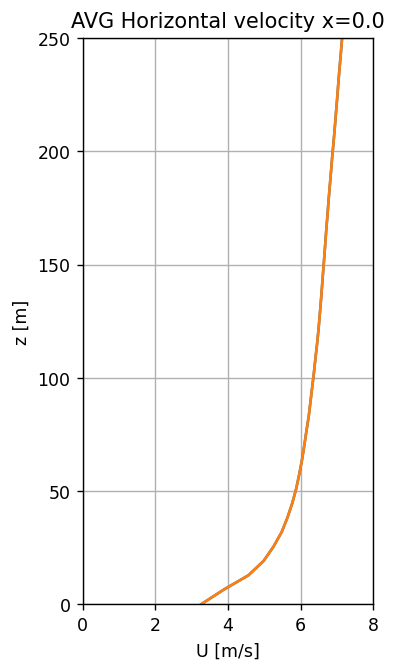

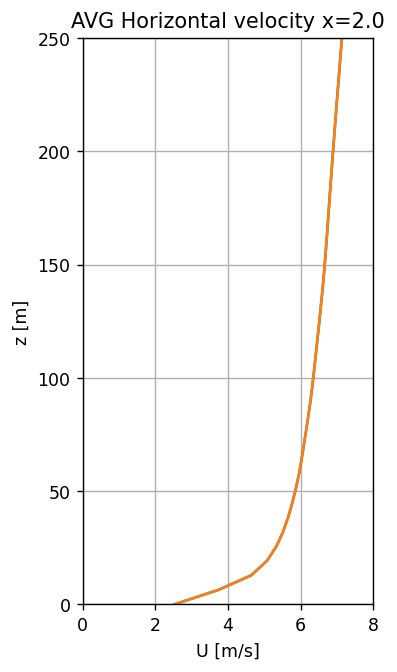

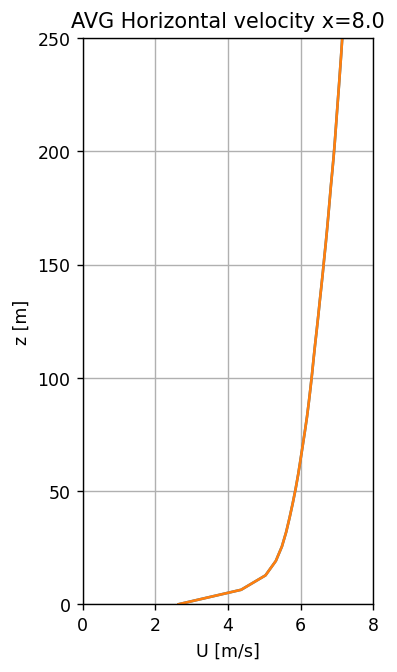

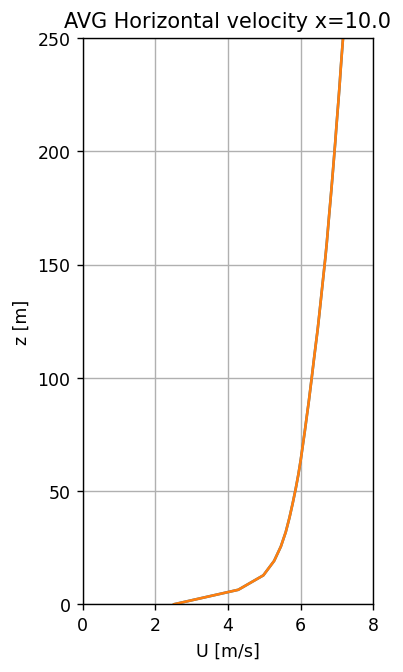

In [13]:
plotplanes = [-2, 0, 2, 8, 10]
allplanes  = np.arange(16)

Uhh_profile_pre = {}

for iplane in allplanes:
    clevels = np.linspace(-0.1, 0.9, 101)
    Uh_turb=np.sqrt(RPdb_turb['velocityx_avg'][iplane,:,:]**2+RPdb_turb['velocityy_avg'][iplane,:,:]**2)
    Uh_noturb=np.sqrt(RPdb_noturb['velocityx_avg'][iplane,:,:]**2+RPdb_noturb['velocityy_avg'][iplane,:,:]**2)
    
    y = RPdb_turb['y'][iplane,:,:]
    z = RPdb_turb['z'][iplane,:,:]
    
    # Average profile
    avgUturb = avgInflowPlane(Uh_turb)
    avgUpre  = avgInflowPlane(Uh_noturb)

    xplane = (np.mean(RPdb_turb['x'][iplane,:,:])-x0)/rotorD

    zvec = z[:,0]
    UHH  = np.interp(90.0, zvec, avgUpre)
    print(xplane, UHH)
    
    Uhh_profile_pre[int(xplane)] = avgUpre

    if iplane in plotplanes:
        fig, ax = plt.subplots(1,1,figsize=(3,6), dpi=125)
        ax.plot(avgUturb, zvec)
        ax.plot(avgUpre,  zvec)
        
        ax.set_xlabel('U [m/s]')
        ax.set_ylabel('z [m]')
        ax.set_title('AVG Horizontal velocity x=%0.1f'%(iplane))
        ax.grid(':')
        ax.set_ylim([0, 250])
        ax.set_xlim([0, 8])

In [22]:
# Save the data
if writeoutputs:
    savedat = zvec #np.vstack((zvec))
    header = 'z '
    for x, g in Uhh_profile_pre.items():
        header += repr(x)+' '
        savedat = np.vstack((savedat, g.transpose()))
    fname   = f'AMRWIND_InflowProfiles_noturbine.dat'
    np.savetxt(datadir+'/'+fname, savedat.transpose(), header=header)